In [1]:
### SARSA stands for (state, action, rewards, next state, next action)

### SARSA was developed from Monte-Carlo policy control, using the concepts of TD Learning.

### TD learning estimates the return G for a state in monte-carlo, using the Q function value of 
### (next state, next action), using the formulation:

### G = R + gamma*Q[s',a']

### as we saw in case of TD learning, where we estimated G using v[s'].

### So, SARSA uses Bootstrapping, as it estimates, and it needs a markovian domain.

### This method has a bias but no variance, and does not need episodic setting

### Every thing else is same as Monte-carlo

### In this case, the policy is updated after visiting a (s,a, r,s',a') tuple.

### In case of Monte carlo, we took, 

### optimal_policy=np.argmax(Q, axis=action)

### So, we updated the entire policy at a time, but in case of SARSA, we update the policy for the state
### which appears in the tuple, as the Q function in that step is updated for that state only, and all the 
### other states Q[s,a] remains the same.

### As: policy[s]=np.argmax(Q[s]).

### This quickens the policy update.

### For Monte Carlo, the updation is done after a complete episode, so Q function is changed for all the states
### we visit in that episode. As a result we update the entire policy at once. 

### Accssing Problem

In [2]:
!pip3 install pygame

     |████████████████████████████████| 11.8MB 5.5MB/s 


In [3]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

In [ ]:
!unzip images.zip

In [ ]:
!unzip modules.zip

In [6]:
from gridworld import GridWorld
import numpy as np

In [7]:
world=\
    """
    wwwwwwwwww
    wa       w
    w    wwwww
    wwww     w
    w        w
    w        w
    w        w
    w g  wwwww
    w        w
    wwwwwwwwww
    """

#### World Declaration
env=GridWorld(world)

env._max_epi_step=200     ## Number of maximum steps in an episode

In [8]:
import matplotlib.pyplot as plt
import cv2

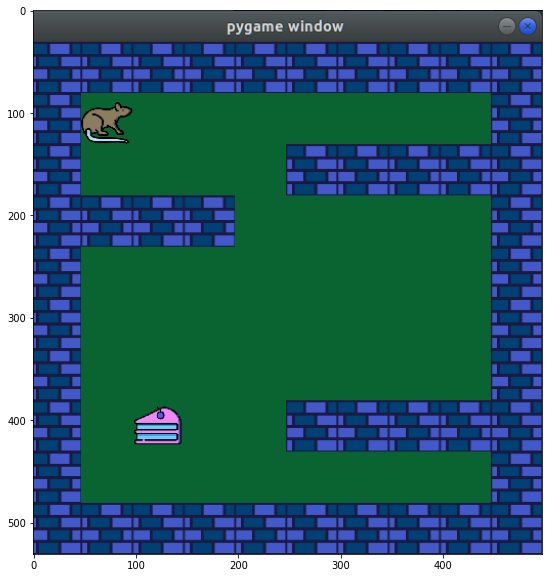

In [9]:
img=cv2.imread("problem_window.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

### SARSA Policy Control

In [10]:
import numpy as np
import tqdm

In [20]:
def generate_sample(policy):

  episodes=[]
  curr_state=env.reset()  ### Returns a starting state.
  action=policy[curr_state] ## action to start off

  while True:
    next_state,reward,done,_=env.step(action)  ### Returns from environment on taking an action
    next_action=policy[next_state]  ### Choosing the next action based on the current policy
    yield(curr_state,action,reward,next_state,next_action)  ### Throws this tuple, works like a generator

    if done== True:
      curr_state=env.reset()  ### Returns a starting state
      action=next_action ## Updating the action as the next action
    else:
      curr_state=next_state ### updating state
      action=policy[curr_state] ### getting the action according state

    
### As in case of SARSA episodic setting is not required, so we just need to throw the tuples to
## Update the value functions accordingly. The action is taken according to the policy.


In [15]:
def get_e(episode,steady_epsilon=0.01,steady_episode=1000):
  ### Obtaining the epsilon for the episode.
  ### The steady epsilon, we settle on is 0.01 after episode 1000
  ### Till 1000, epsilon decays linearly.

  if episode>steady_episode:  ##If we are above the steady episode, we return a steady epsilon
    return steady_epsilon
  else:
    slope=(steady_epsilon - 1)/(steady_episode - 0) 
    ### Line (1,0) to (steady_epsilon,steady_episode)

    ### slope*episode will give us the decrease in the value of epsilon
    ### To get the value we add 1 to the value so it is (1 - decrease), as epsilon starts from 1.
    return slope*episode + 1

In [16]:
def obtain_action_greed(Q_function, state, epsilon, actions):
  ### Obtaining policy based on the current Q function values, and epsilon value.
  ### This method is called E-greedy policy.

  ### "state" represents the state for which the policy is being updated

  optimal_action=np.argmax(Q_function[state])  ### finding the action for the state that
  ## provides the maximum Q-value

  if np.random.random()<=1-epsilon:  ### Random.random() generates number in (0,1) 
  ###probability 1/(b-a). where b and a are upper and lower limits
    chosen_action=optimal_action
    #### Choosing the best action according to policy. with probability (1-epsilon)
  else:
    chosen_action=np.random.choice(actions)
    ### else choosing random action with probability epsilon/|actions| for each.
  
  return chosen_action ### The action for the given state

In [22]:
def get_policy(gamma=0.99,alpha=0.01):
  Q=np.zeros((env.state_count,len(env.action_space)))

  ### initializing the Q function to record the details of the actions on a particular state.
  epsilon=1 ## Initially exploration control value 1: maximum
  policy=np.random.choice(env.action_space,size=env.state_count)
  ### Initialized a complete random policy, an action for each state.
  
  generator=generate_sample(policy) ### initializing a generator.
  for tuple_number in tqdm.tqdm(range(100000)):  
    ### We train on a batch of 100000 collected episodes.
    s,a,r,s_,a_= next(generator)### Generating the next sample

    Q[s,a]=Q[s,a]+alpha*((r + gamma*Q[s_,a_])-Q[s,a]) ### Bootstrapping type update of Q function
    
    epsilon=get_e(tuple_number) ### Getting the epsilon for the update.
    policy[s]=obtain_action_greed(Q,s,epsilon,env.action_space)
    ### Updating the policy for the state under consideration.
  return policy

In [23]:
policy=get_policy()

100%|██████████| 100000/100000 [00:07<00:00, 14036.55it/s]


In [24]:
policy

array([0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 3, 0, 1, 1, 1, 2,
       2, 0, 3, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 3, 2, 0, 2, 2,
       2, 3, 2, 3, 3, 2, 3, 0, 2])

In [25]:
env.setPolicy(policy)

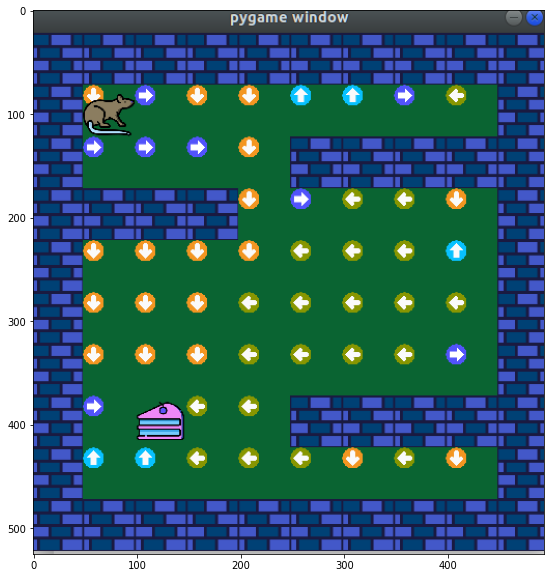

In [26]:
img=cv2.imread("Route_sarsa.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

In [ ]:
### SARSA: considers the Q value of the next state and next action to estimate the current Q value and 
### of the current action on the current state.

## NO variance.